# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merged_data = merged_data.sort_index()


merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
total_mice = merged_data["Mouse ID"].value_counts().count()
total_mice

249

In [3]:
# Find any duplicates in dataset 
duplicate_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [4]:
# Retrieve all data for the duplicate mouse ID
g989_df = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Clean data by dropping duplicate from dataset
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking number of mice in the clean DataFrame
total_mice_cleaned = cleaned_data["Mouse ID"].value_counts().count()
total_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_values = grouped_drug.mean()
median_values = grouped_drug.median()
var_values = grouped_drug.var()
std_values = grouped_drug.std()
sem_values = grouped_drug.sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_values,
    "Median Tumor Volume": median_values,
    "Tumor Volume Variance": var_values,
    "Tumor Volume Std. Dev.": std_values,
    "Tumor Volume Std Error": sem_values
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using aggregation method 
summary_stats_agg = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean","median", "var", "std", "sem"
])

summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

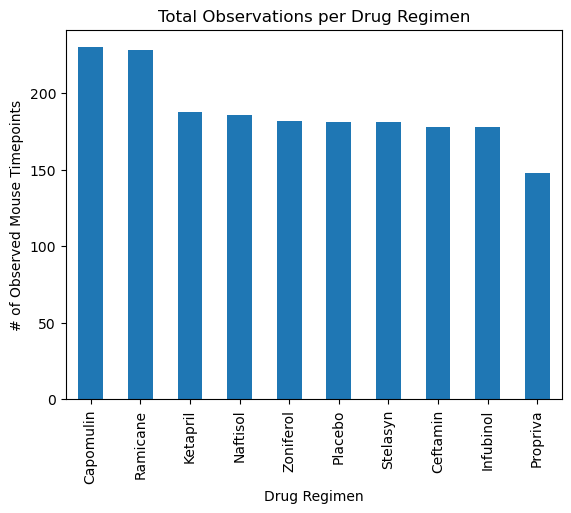

In [20]:
# Generating bar chart showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
timepoint_rows = cleaned_data.groupby("Drug Regimen").size().sort_values(ascending=False)

figure1 = timepoint_rows.plot(kind="bar", 
                              xlabel = "Drug Regimen",
                              ylabel="# of Observed Mouse Timepoints",
                              title="Total Observations per Drug Regimen")

plt.show()

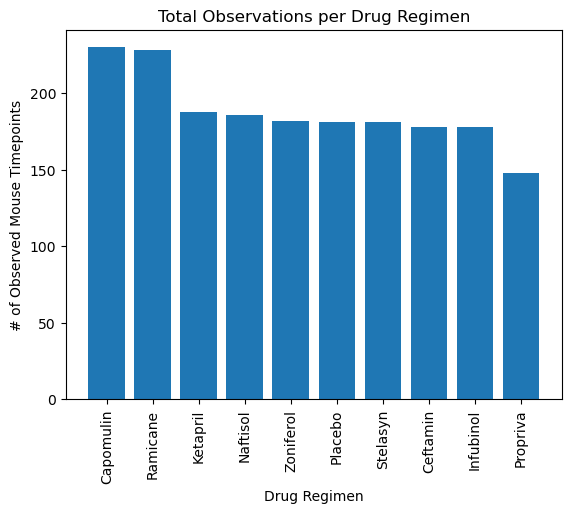

In [36]:
# Generating bar chart showing the total number of rows for each drug regimen using pyplot
figure2 = plt.bar(timepoint_rows.index, timepoint_rows)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Observations per Drug Regimen")
plt.show()


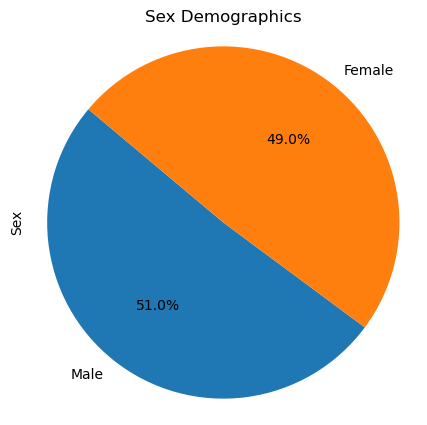

In [22]:
# Generating pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data["Sex"].value_counts()

figure3 = gender_distribution.plot.pie(
    autopct='%1.1f%%', 
    startangle=140,
    ylabel="Sex",
    figsize=(5, 5), 
    title="Sex Demographics"
)
plt.axis('equal')
plt.show()

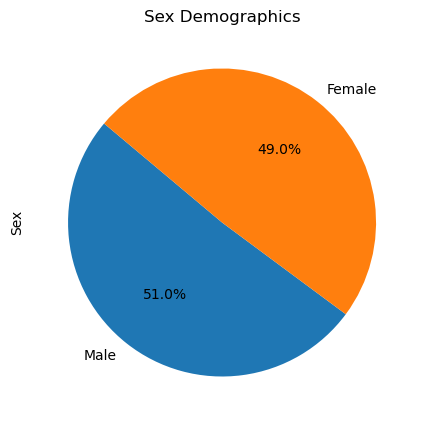

In [24]:
# Generating pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
figure4, ax4 = plt.subplots(figsize=(5, 5))
ax4.pie(gender_distribution, labels=labels,
       autopct='%1.1f%%', startangle=140)
plt.ylabel("Sex")
plt.title("Sex Demographics")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculating final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Retrieve last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.DataFrame(last_timepoints)

# Merge group df with original DataFrame determine tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, cleaned_data, on=["Mouse ID", "Timepoint"], how="inner")
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Calculating IQR to identify potential outliers 
for treatment in treatments:
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data)

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

  
    print(f"{treatment}'s potential outliers: {outliers}\n")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



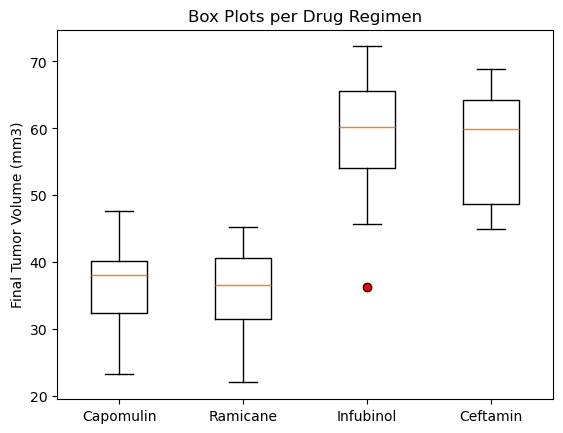

In [25]:
# Generating box plot that shows the distribution of the tumor volume for each treatment group
fig5, ax5 = plt.subplots()
ax5.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='red'))
ax5.set_ylabel("Final Tumor Volume (mm3)")
plt.title("Box Plots per Drug Regimen")
plt.show()


## Line and Scatter Plots

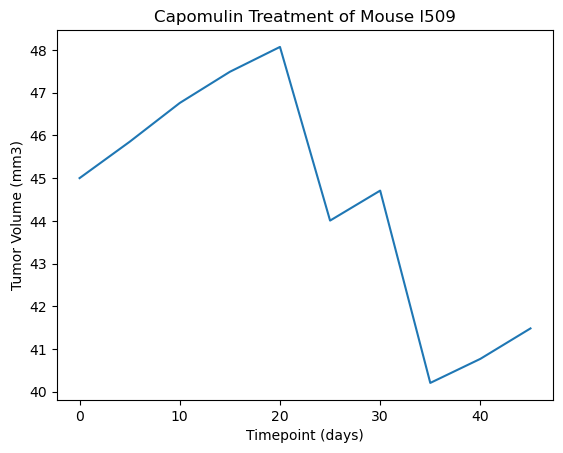

In [16]:
# Generating line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == "Capomulin") & 
                                  (cleaned_data['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.title((f'Capomulin Treatment of Mouse {mouse_id}'))
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

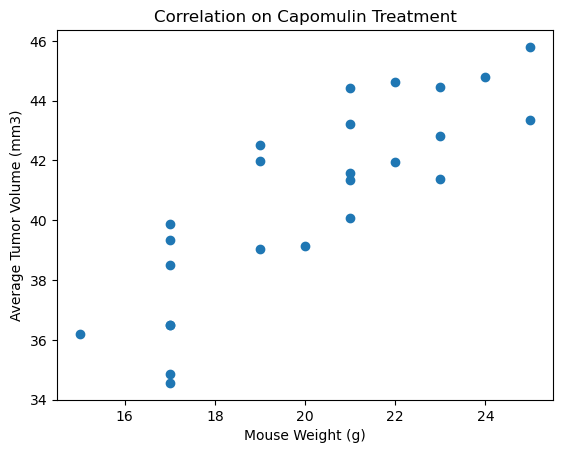

In [28]:
# Generating scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == "Capomulin")]
avg_tumor = all_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = all_capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Correlation on Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


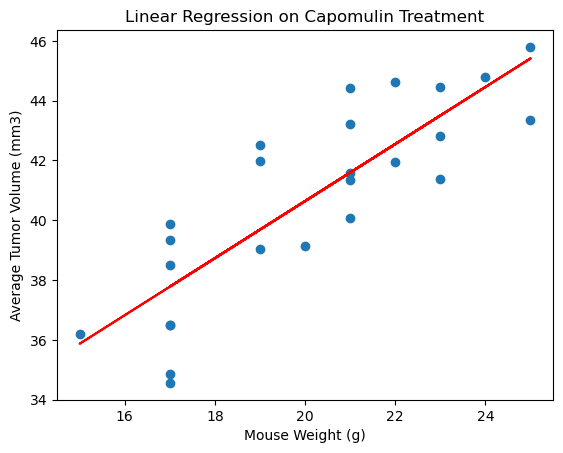

In [29]:
# Calculating correlation coefficient and linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f'The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(avg_weight, avg_tumor)[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
regression_values = avg_weight * slope + intercept

plt.scatter(avg_weight, avg_tumor)
plt.plot(avg_weight, regression_values, color='r')
plt.xlabel("Mouse Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression on Capomulin Treatment')
plt.show()